In [5]:
#Import thư viện cần thiết 
# EDA Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.subplots as sp
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Data Preprocessing Libraries 
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Machine Learing (classification models) Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_regression, RFE, SelectFromModel
from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score 
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [3]:
#Chạy dữ liệu 
import pandas as pd
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.info

<bound method DataFrame.info of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income

In [5]:
#Xác định số lượng quan sát
len(df['CLIENTNUM'].unique())

10127

In [6]:
# Dropping columns with unusual names
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
#Khai phá dữ liệu 
cat_col = [x for x in df.columns if df[x].dtype == 'O']
num_col = [x for x in df.columns if x not in cat_col]

print('cat_col : {} \n\
num_col : {}'.format(len(cat_col), len(num_col)))

cat_col : 6 
num_col : 15


<Axes: >

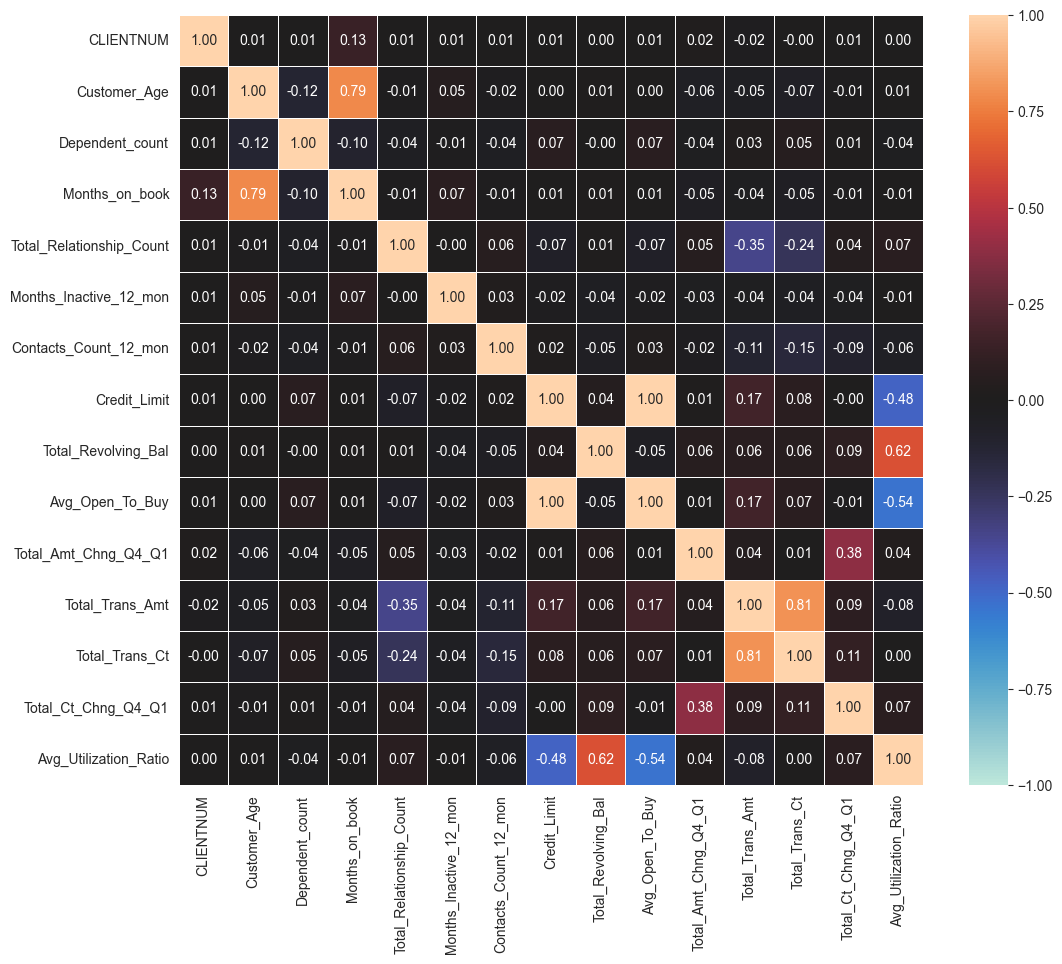

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df[num_col].corr(), vmin=-1.0, vmax=1.0, linewidths=0.5, cmap='icefire', annot=True, fmt='.2f')

In [2]:
import pandas as pd
df = pd.read_csv('BankChurners.csv')
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
5669,772082208,Existing Customer,39,M,1,Graduate,Single,$120K +,Blue,28,...,16199.0,0,16199.0,0.771,4254,82,0.673,0.000,0.000107,0.999890
5139,716373483,Attrited Customer,48,F,5,Graduate,Married,Less than $40K,Blue,40,...,2860.0,2517,343.0,0.380,1544,45,0.364,0.880,0.994640,0.005360
2682,774172158,Existing Customer,29,M,1,Unknown,Single,$60K - $80K,Blue,19,...,23507.0,1990,21517.0,0.631,2650,65,0.912,0.085,0.000057,0.999940
9915,780118158,Existing Customer,27,M,0,Graduate,Single,Less than $40K,Blue,13,...,3585.0,2420,1165.0,0.812,15656,124,0.746,0.675,0.000280,0.999720
4657,715339758,Existing Customer,64,F,1,High School,Divorced,Unknown,Blue,36,...,18038.0,1184,16854.0,0.827,4168,64,0.600,0.066,0.000099,0.999900
857,824805858,Existing Customer,39,F,2,Uneducated,Single,Less than $40K,Blue,35,...,9235.0,1479,7756.0,0.843,1537,49,0.581,0.160,0.000311,0.999690
5736,768544833,Existing Customer,45,F,4,Uneducated,Single,Less than $40K,Blue,39,...,2202.0,1414,788.0,0.593,4531,77,0.540,0.642,0.000206,0.999790
1746,820288233,Existing Customer,26,F,0,Uneducated,Single,Less than $40K,Blue,20,...,1438.3,0,1438.3,0.764,2731,39,0.500,0.000,0.000455,0.999540
4999,714726858,Attrited Customer,31,F,0,Post-Graduate,Divorced,Less than $40K,Blue,36,...,4871.0,0,4871.0,0.890,2773,34,0.789,0.000,0.996740,0.003262
1920,771196083,Existing Customer,47,M,4,Graduate,Married,$80K - $120K,Blue,34,...,18178.0,0,18178.0,0.922,1837,37,0.682,0.000,0.000317,0.999680


In [12]:
#Kiểm tra data bị missing
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<h1>Xử lý dữ liệu ngoại lai<h1>

In [6]:
#Chia các cột thành các dữ liệu định tính và định lượng 
categorical_features = [
    'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
    'Income_Category', 'Card_Category'
]

numerical_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

#Numerical data: Dữ liệu số là những con số, không phải từ ngữ hay mô tả. Dữ liệu định lượng biểu thị các giá trị số
#Categorical data: Có thể được lưu trữ bằng tên hoặc label Bởi vì nó xác định chất lượng dữ liệu trước khi phân loại nên đôi khi nó được gọi là dữ liệu định tính.

<h4>
    Sử dụng hàm detect_outliers để phát hiện các ngoại lệ trong bộ dữ liệu df. Hàm có ba tham số đầu vào: df, features và n. df là bộ dữ liệu chứa các giá trị cần kiểm tra. features là danh sách các thuộc tính trong df muốn kiểm tra. n là ngưỡng cho phép của ngoại lệ. Nếu giá trị của một thuộc tính vượt quá ngưỡng này, nó sẽ được coi là ngoại lệ.
Hàm detect_outliers sẽ trả về một danh sách các chỉ số của các ngoại lệ trong df. Sau đó, câu lệnh number_of_outliers = len(outliers_indices) sẽ đếm số lượng ngoại lệ và lưu trữ kết quả vào biến number_of_outliers.<h4>

In [7]:
#Phát hiện các thành phần ngoại lai 
outliers_indices = detect_outliers(df, features=numerical_features, n=1.5)
number_of_outliers = len(outliers_indices)

# Số lượng ngoại lai
print(f'Number of outliers: {number_of_outliers}')

Number of outliers: 1274


In [8]:
#Loại bỏ thành phần ngoại lai 
df = df.drop(outliers_indices)

<h4 In ra kích thước của bộ dữ liệu df sau khi loại bỏ các ngoại lệ.
Chuỗi f"Dataset Shape After Removing Outliers {df.shape}" là một chuỗi được định dạng f-string, chứa biến df.shape để hiển thị kích thước của bộ dữ liệu df sau khi loại bỏ các ngoại lai<h4>

In [9]:
print(f"Dataset Shape After Removing Outliers {df.shape}")

Dataset Shape After Removing Outliers (8853, 23)


<h1>Xử lý dữ liệu định tính<h1>

<h4>Danh nghĩa: Các danh mục không có thứ tự hoặc xếp hạng có ý nghĩa như (Attrition_Flag, Giới tính, Tình trạng hôn nhân)
Thứ tự: Các danh mục có thứ tự hoặc thứ hạng có ý nghĩa như (Trình độ học vấn, Danh mục thu nhập, Card Category)<h4>

In [9]:
# Dùng phương pháp map để xử lý dữ liệu có thứ tự
#Số hoá các đặc điểm (dữ liệu phân loại hay categorical data)

attrition_flag_dic = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
}

edu_level_dic = {  
    'Unknown': 0, 
    'Uneducated': 1, 
    'High School': 2, 
    'College': 3,
    'Post-Graduate': 4, 
    'Graduate': 5, 
    'Doctorate': 6
} 

income_cat_dic = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}

card_cat_dic = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}

df['Attrition_Flag'] = df['Attrition_Flag'].map(attrition_flag_dic)

df['Education_Level'] = df['Education_Level'].map(edu_level_dic)

df['Income_Category'] = df['Income_Category'].map(income_cat_dic)

df['Card_Category'] = df['Card_Category'].map(card_cat_dic)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,0,45,M,3,2,Married,3,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,0,49,F,5,5,Single,1,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,0,51,M,3,5,Married,4,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,0,40,F,4,2,Unknown,1,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,0,40,M,3,1,Married,3,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [10]:
#Sử dụng hàm 'get_dummies' để xử lý dữ liệu không theo thứ tự 
df = pd.get_dummies(df, columns=['Gender', 'Marital_Status'])

#Áp dụng mã hoá one-hot và xem còn bao nhiêu mục cho phần test và train sau đây
encoded = list(df.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

27 total features after one-hot encoding.


<h4>Mã hóa one-hot cho dữ liệu định tính không có thứ tự (nominal data). Cách truyền thống nhất để đưa dữ liệu hạng mục về dạng số là mã hóa one-hot. Trong cách mã hóa này, một “từ điển” được xây dựng chứa tất cả các giá trị có khả năng lấy từ từng dữ liệu hạng mục. Sau đó mỗi giá trị hạng mục sẽ được mã hóa bằng một vector nhị phân với toàn bộ các phần tử bằng 0 trừ một phần tử bằng 1 tương ứng với vị trí của giá trị hạng mục đó trong từ điển.<h4>

<h4>Mã hoá one-hot là phương pháp phổ biến để xử lý dữ liệu phân loại (categorical data) trong Machine Learning. Các biến phân loại phải được thay đổi trong phần Pre-processing vì các mô hình học máy yêu cầu các biến đầu vào dạng số. Dữ liệu nominal (danh nghĩa) hoặc thứ tự (ordinal) có thể được tìm thấy trong dữ liệu phân loại (categorical data).<h4>

In [3]:
#Hiển thị lại các mục sau khi mã hoá one-hot để thấy sự thay đổi 
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


<h1> Chia dữ liệu thành tập Train và tập Test <h1>

<h5>Đây là phương pháp có sử dụng bộ dữ liệu validation set, tức là để riêng ra một bộ dữ liệu để kiểm thử (testing set), và trong lượng dữ liệu còn lại lại chia nhỏ thành 2 phần, 1 phần để train mô hình (thường khoảng 80% lượng dữ liệu còn lại), và một phần để kiểm chứng và hiệu chỉnh mô hình (validation – 20% dữ liệu còn lại).<h5>

In [7]:
#Lấy dữ liệu để train và test
# lấy dữ liệu cho biến dự đoán và biến mục tiêu
x = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

In [8]:
#
x.shape, y.shape

((10127, 22), (10127,))

In [9]:
# chia dữ liệu thành 2 tập: Train và Test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# hiển thị kết quả mẫu cho từng tập
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 8101 samples.
Testing set has 2026 samples.


<h1>Xử lý dữ liệu mất cân bằng<h1>

<h5>Mất cân bằng dữ liệu là một trong những hiện tượng phổ biến của bài toán phân loại nhị phân (binary classification). Trong trường hợp tỷ lệ dữ liệu giữa 2 classes là 50:50 thì được coi là cân bằng. Khi có sự khác biệt trong phân phối giữa 2 classes, chẳng hạn 60:40 thì dữ liệu có hiện tượng mất cân bằng.<h5>

<h4>Vì nhóm xây dựng dữ liệu theo bài toán phân loại nhị phân nên sẽ có sự mất cân bằng dữ liệu nhất định.<h4>

In [10]:
y_train.value_counts()
#Đếm dữ liệu các đặc điểm trong biến Attrition_Flag

Attrition_Flag
Existing Customer    6801
Attrited Customer    1300
Name: count, dtype: int64

In [11]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'F'

<h4>SMOTE (Synthetic Minority Over-sampling) và ADASYN (Adaptive synthetic sampling) là các phương pháp sinh mẫu nhằm gia tăng kích thước mẫu của nhóm thiểu số trong trường hợp xảy ra mất cân bằng mẫu. Để gia tăng kích thước mẫu, với mỗi một mẫu thuộc nhóm thiểu số ta sẽ lựa chọn ra 
 mẫu láng giềng gần nhất với nó và sau đó thực hiện tổ hợp tuyến tính để tạo ra mẫu giả lập. Phương pháp để lựa chọn ra các láng giềng của một quan sát có thể dựa trên thuật toán kNN hoặc SVM.<h4>

In [20]:
y_train.value_counts()
#Kiểm tra lại xem dữ liệu còn mất cân bằng không?

Attrition_Flag
Existing Customer    6801
Attrited Customer    1300
Name: count, dtype: int64

<h1>Chuẩn hoá dữ liệu<h1>

In [35]:
#Tạo hàm StandardScaler 
#Quy đổi dữ liệu scale
scaler = StandardScaler()

#Đưa hàm vào tệp dữ liệu train ở trên
scaler.fit(X_train[num_col])

#Chuẩn hoá các biến liên tục trong dữ liệu đã train và test ở trên
X_train_cont_scaled = scaler.transform(X_train[num_col])
X_test_cont_scaled = scaler.transform(X_test[num_col])

#Thay thế dữ liệu gốc bằng dữ liệu đã chuẩn hoá
X_train[num_col] = X_train_cont_scaled
X_test[num_col] = X_test_cont_scaled

X_train

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9066,-0.705953,0.959061,F,-1.035122,Unknown,Single,Unknown,Blue,0.009523,-1.812952,0.644039,0.499433,-0.540791,0.696075,-0.603671,-0.765315,1.220348,1.447350,-0.142814,0.694933
5814,-0.674126,1.457688,F,1.291390,High School,Married,Unknown,Blue,1.505062,-1.812952,1.630121,0.499433,-0.356658,0.788048,-0.427675,-1.236110,-0.674993,-1.099888,-1.333757,0.221479
792,-0.566846,-0.162849,F,1.291390,Unknown,Single,Less than $40K,Gold,0.009523,1.409234,-1.328125,0.499433,0.808999,0.597970,0.755842,-0.132971,-0.872259,-1.227250,2.247431,-0.619812
1791,-0.488557,-1.534073,F,-0.259618,Graduate,Single,Less than $40K,Blue,0.009523,0.120360,0.644039,1.408012,-0.551577,1.663634,-0.701361,1.833294,-0.525353,-0.802711,2.456369,1.532583
5011,-0.517495,0.335778,F,-0.259618,High School,Married,$40K - $60K,Blue,0.383408,0.764797,0.644039,1.408012,-0.651182,0.938885,-0.735944,-0.733005,-0.175507,-0.165901,0.341921,1.583570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.810473,-0.287506,F,-1.035122,Graduate,Single,$40K - $60K,Blue,0.258779,-0.524077,-0.342043,2.316591,-0.494675,1.663634,-0.644421,0.222434,-0.675875,-0.887619,0.504893,1.219375
5191,-0.669797,0.834404,F,0.515886,High School,Divorced,Unknown,Blue,0.009523,0.120360,0.644039,3.225171,-0.076773,-1.422990,0.050975,-0.968403,-0.627367,-0.972527,-1.672236,-0.994933
5390,-0.677003,-0.536819,F,1.291390,Graduate,Unknown,Less than $40K,Blue,-0.488990,-0.524077,-1.328125,-0.409147,-0.695867,0.474113,-0.738918,0.199355,0.080850,0.386000,1.202744,1.441534
860,-0.511635,-0.786133,M,0.515886,Unknown,Single,$40K - $60K,Blue,-0.987503,0.120360,-1.328125,-1.317726,-0.558401,0.670323,-0.618980,-1.176107,-0.858735,-0.972527,-1.672236,0.749563


<h4>Hàm StandardScaler() là một hàm trong thư viện sklearn của Python.Hàm StandardScaler() được dùng để quy đổi tỷ lệ của các giá trị khác nhau để so sánh.

Trong thực tế dữ liệu có các giá trị khác nhau và đơn vị đo lường khác nhau mà chúng khó có thể so sánh được.Ví dụ làm thế nào để so sánh các giá trị là kg và m hoặc độ cao và thời gian…Để giải quyết cho bài toán này chúng ta có thể sử dụng tính năng mở rộng Scale để quy đổi sang một giá trị mới để dễ dàng so sánh hơn.<h4>